In [ ]:
import pandas as pd
import numpy as np

In [ ]:
datas = np.genfromtxt("/content/drive/MyDrive/strawberry/NIR preprocessing beef from Yihang/NIR processing trial/nir pre result/349.csv",delimiter=",")
data = datas.T
data = data[1:]

In [ ]:
print(data.shape) #a30-a1,b30-b1,c30-c1
data

(90, 307)


array([[-0.02954702, -0.0134637 ,  0.00286759, ...,  0.05543357,
         0.05487974,  0.05464862],
       [-0.05579413, -0.03859332, -0.02147372, ...,  0.05499733,
         0.05455094,  0.05438696],
       [ 0.01905172,  0.03060846,  0.04218583, ...,  0.05474704,
         0.05396882,  0.05361598],
       ...,
       [-0.34058163, -0.32425165, -0.30724177, ...,  0.05429621,
         0.0537823 ,  0.05362722],
       [-0.36595873, -0.35010692, -0.33349172, ...,  0.05414876,
         0.05370826,  0.05364202],
       [-0.34935773, -0.33306505, -0.31609602, ...,  0.05460712,
         0.0540429 ,  0.0538611 ]])

In [ ]:
# Install required packages
!pip install k-means-constrained

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 21.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: absl-py
    Found existing

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from k_means_constrained import KMeansConstrained
from sklearn.metrics import silhouette_score

# Apply k-means-constrained with equal cluster sizes of 30
kmeans = KMeansConstrained(
    n_clusters=3,
    size_min=30,  # minimum cluster size = 30
    size_max=30,  # maximum cluster size = 30
    random_state=42
)

# Fit and predict clusters
clusters = kmeans.fit_predict(data)

# Create sample labels
sample_labels = ['A']*30 + ['B']*30 + ['C']*30

# Create a DataFrame for analysis
results_df = pd.DataFrame({
    'Sample': [f"#{label}{30-i}" for label, i in zip(sample_labels, list(range(30))*3)],
    'True_Group': sample_labels,
    'Predicted_Cluster': clusters
})

# Print clustering results
print("\nClustering Results:")
print(results_df)

# Calculate silhouette score
silhouette_avg = silhouette_score(data, clusters)
print(f"\nSilhouette Score: {silhouette_avg:.6f}")

# Print cluster sizes
print("\nCluster Sizes:")
print(pd.Series(clusters).value_counts().sort_index())

# Create confusion matrix-like table
confusion_df = pd.crosstab(
    results_df['True_Group'],
    results_df['Predicted_Cluster'],
    margins=True
)
print("\nGroup Distribution in Clusters:")
print(confusion_df)


Clustering Results:
   Sample True_Group  Predicted_Cluster
0    #A30          A                  1
1    #A29          A                  1
2    #A28          A                  1
3    #A27          A                  1
4    #A26          A                  1
..    ...        ...                ...
85    #C5          C                  0
86    #C4          C                  0
87    #C3          C                  0
88    #C2          C                  0
89    #C1          C                  0

[90 rows x 3 columns]

Silhouette Score: 0.576937

Cluster Sizes:
0    30
1    30
2    30
Name: count, dtype: int64

Group Distribution in Clusters:
Predicted_Cluster   0   1   2  All
True_Group                        
A                   0  30   0   30
B                   1   0  29   30
C                  29   0   1   30
All                30  30  30   90


In [ ]:
from google.colab import files
results_df.to_csv('clustering_results.csv', index=False)
files.download('clustering_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

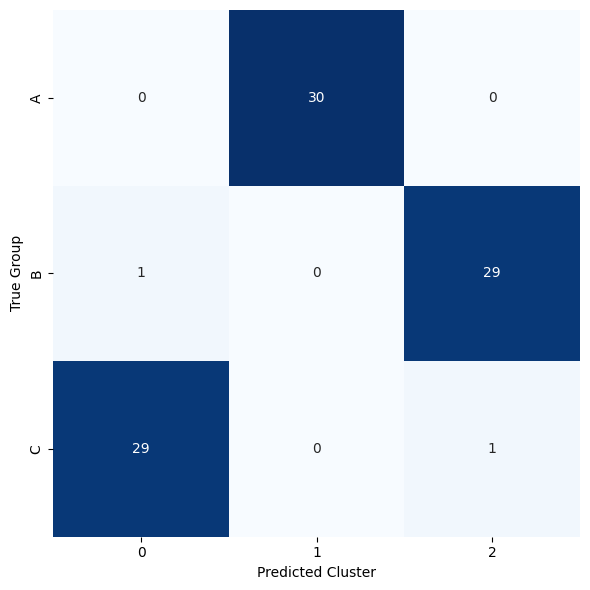

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix data
conf_matrix = np.array([
    [0, 30, 0],    # A row
    [1, 0, 29],    # B row
    [29, 0, 1]     # C row
])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,
            annot=True,            # Show numbers in cells
            fmt='d',               # Use integer format
            cmap='Blues',          # Blue color scheme
            xticklabels=[0, 1, 2], # Cluster labels
            yticklabels=['A', 'B', 'C'], # True group labels
            square=True,           # Make cells square
            cbar=False)            # Remove the colorbar

# plt.title('Confusion Matrix of K-means-constrained Clustering')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Group')
plt.tight_layout()
plt.show()

# Optional: save the plot
# plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')